# Plotting on original grid with cartopy

If you would like to try to repeat examples from this introduction, you can download FESOM2 data and mesh. The data are quite heavy, about 1.5Gb in bzip2 archive.

Link: https://swiftbrowser.dkrz.de/public/dkrz_c719fbc3-98ea-446c-8e01-356dac22ed90/PYFESOM2/

You have to download `LCORE2.tar` and `core2.tar.bz2` archives and extract them.


Alternative would be to use very light weight mesh that comes with pyfesom2 in the `tests/data/pi-grid/` and example data on this mesh in `tests/data/pi-results`.

## Warning

Current version is still quite buggy, so don't expect that thing are running ery smothly :) Please submit bug reports to: 

## Plotting variables located on nodes (vertices)

In [1]:
import pyfesom2 as pf
import matplotlib.cm as cm

In [2]:
mesh = pf.load_mesh('../../DATA/core2/')

/Users/nkolduno/PYTHON/DATA/core2/pickle_mesh_py3_fesom2
The usepickle == True)
The pickle file for FESOM2 exists.
The mesh will be loaded from /Users/nkolduno/PYTHON/DATA/core2/pickle_mesh_py3_fesom2


In [3]:
data_path = '../../DATA/LCORE2/'

First load the data on the surface layer

In [4]:
data = pf.get_data(data_path, "temp", [1948, 1949], mesh, how="mean", compute=True, depth=0)

Model depth: 0.0


Minimum input is mesh and data 

CPU times: user 512 ms, sys: 19.6 ms, total: 531 ms
Wall time: 531 ms


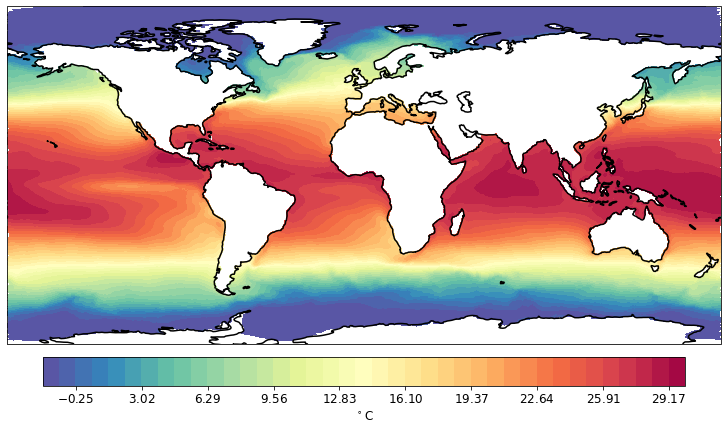

In [5]:
%%time
pf.tplot(mesh, data)

You can provide several data arrays as an input. You should specify `rowcol` variable then, to define how the output will be arranged.

CPU times: user 1.16 s, sys: 34.3 ms, total: 1.2 s
Wall time: 1.2 s


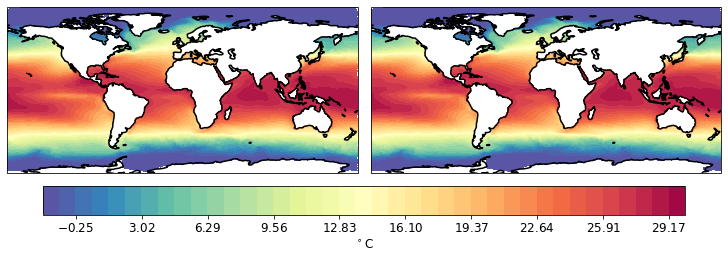

In [6]:
%%time
pf.tplot(mesh, [data, data], rowscol=(1,2))

One can plot smallare resion by specifying the `box`.

TODO:
 - This does not work with standard `pc` at the moment (at least if the southern boundary is above the equator)
 - With `merc` projection only properly works untill 84N. Then show artefacts. 

CPU times: user 95.1 ms, sys: 4.51 ms, total: 99.6 ms
Wall time: 98 ms


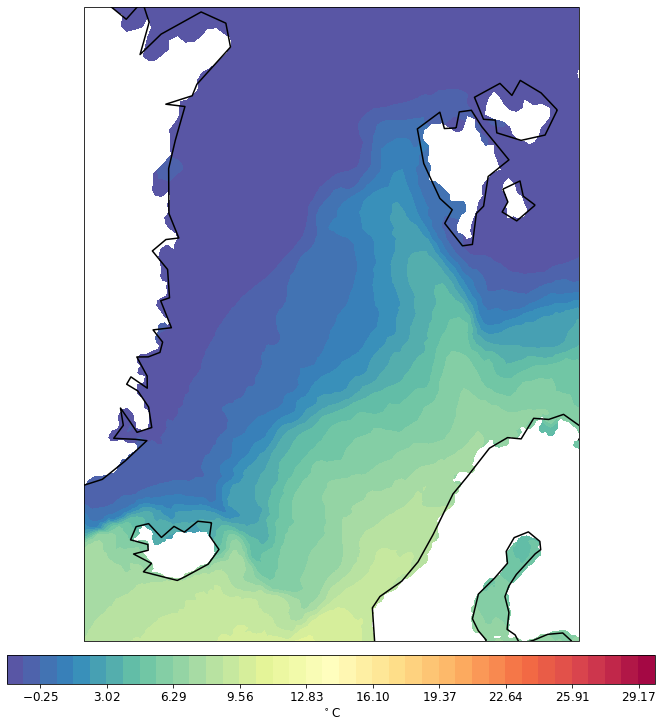

In [7]:
%%time
pf.tplot(mesh, data, ptype='cf', box=[-30, 30, 60, 82], mapproj='merc')

Instead of `cf` (tricontourf), one can change to the `tri` (tripcolor) plot.

TODO
- This works with both `merc` and `pc`, and one can set the northern limit to 90.

CPU times: user 5.03 s, sys: 25.5 ms, total: 5.06 s
Wall time: 4.79 s


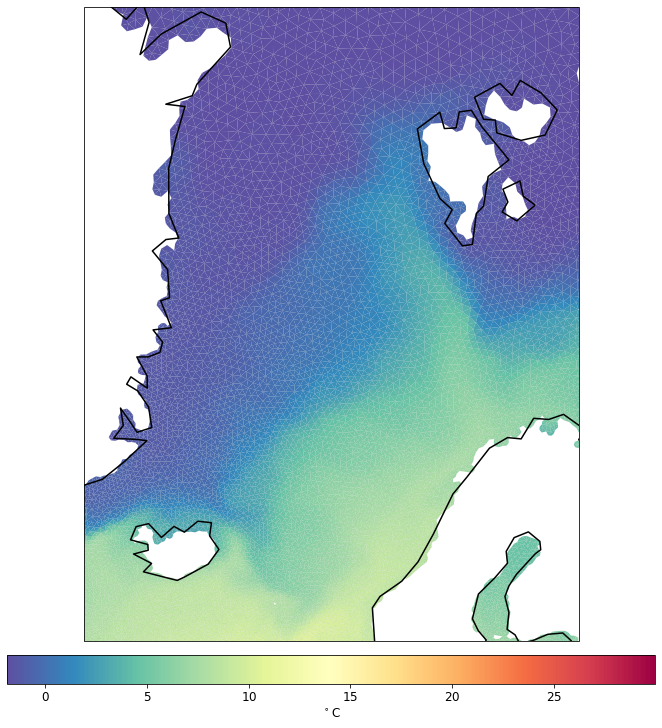

In [8]:
%%time
pf.tplot(mesh, data, ptype='tri', box=[-30, 30, 60, 82], mapproj='merc')

To highlight the mesh structire more, you can change the `lw` parameter.

CPU times: user 4.98 s, sys: 33.1 ms, total: 5.01 s
Wall time: 4.78 s


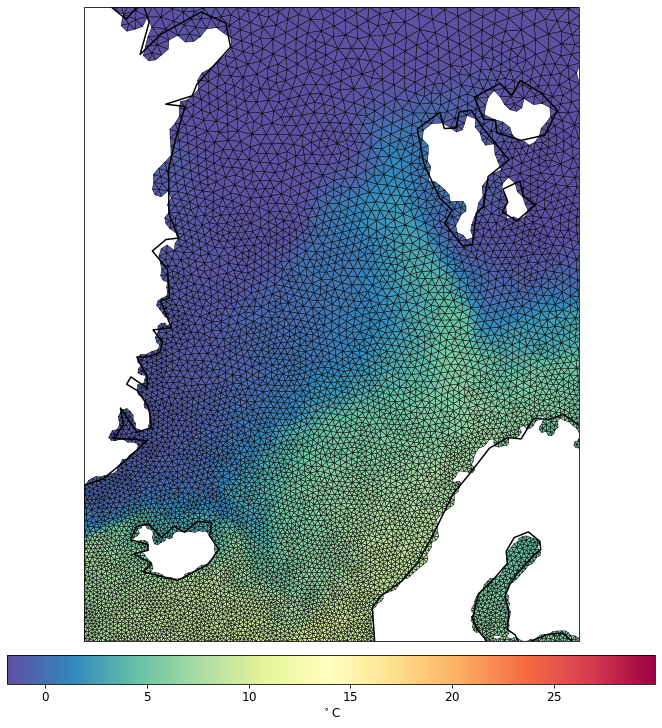

In [9]:
%%time
pf.tplot(mesh, data, ptype='tri', box=[-30, 30, 60, 82], mapproj='merc', lw=0.5)

Let's try different depth

In [10]:
data = pf.get_data(data_path, "temp", [1948, 1949], mesh, how="mean", compute=True, depth=2000)

Model depth: 1920.0


TODO:

 - NaNs do not work for tri* functions somehow. We had to put the empty nodes to -99999.
 - For `tripcolor` this leads to filling of NaNs by the same color.
 - One has to specify the range manually. 

minimum level changed to make cartopy happy
CPU times: user 4.97 s, sys: 52.2 ms, total: 5.02 s
Wall time: 4.8 s


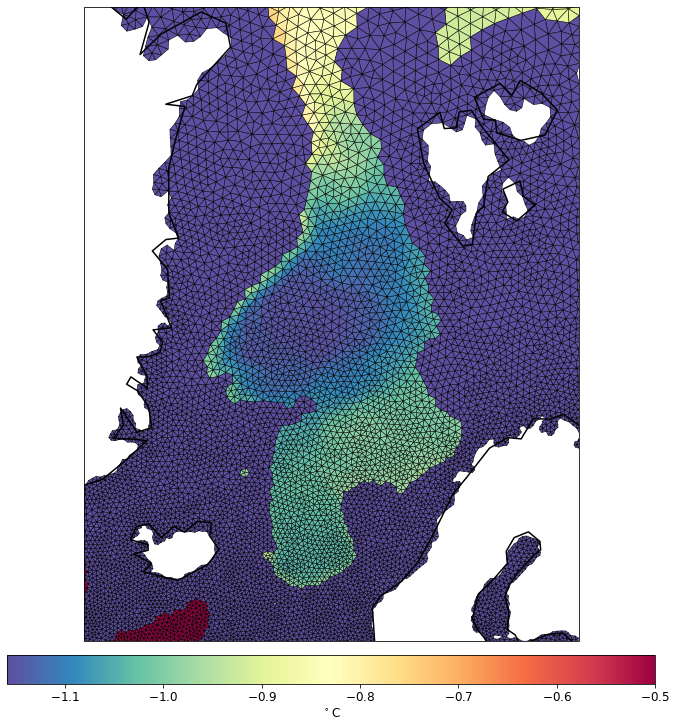

In [11]:
%%time
pf.tplot(mesh, data, ptype='tri', box=[-30, 30, 60, 82], mapproj='merc', lw=0.5, levels=(-1.5, -0.5, 41))

TODO:

- For `cf` the NaNs (which are set to -9999) are not plotted, but one has to be again careful with specifying the range. 

CPU times: user 87.9 ms, sys: 5 ms, total: 92.9 ms
Wall time: 92.6 ms


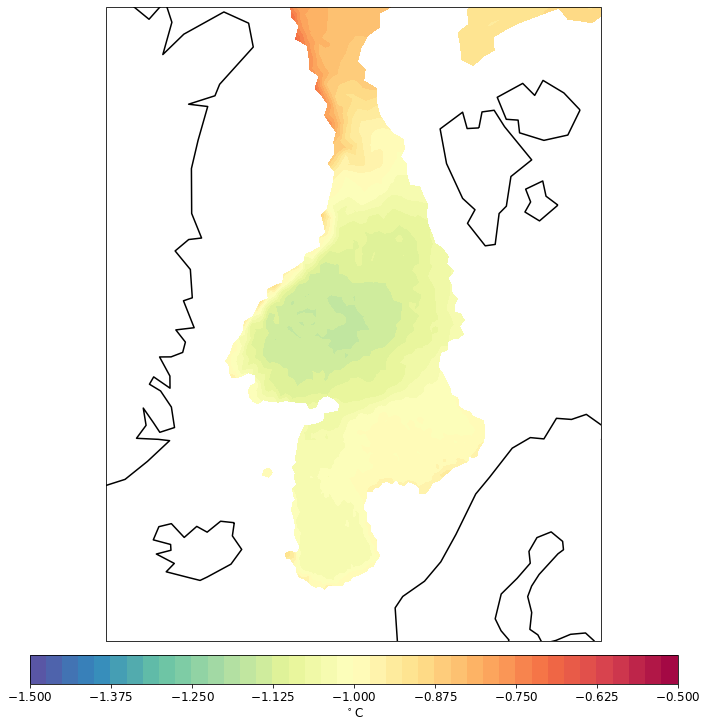

In [12]:
%%time
pf.tplot(mesh, data, ptype='cf', box=[-30, 30, 60, 82], mapproj='merc', lw=0.5, levels=(-1.5, -0.5, 41))

North polar stereo projection:

CPU times: user 178 ms, sys: 6.36 ms, total: 184 ms
Wall time: 184 ms


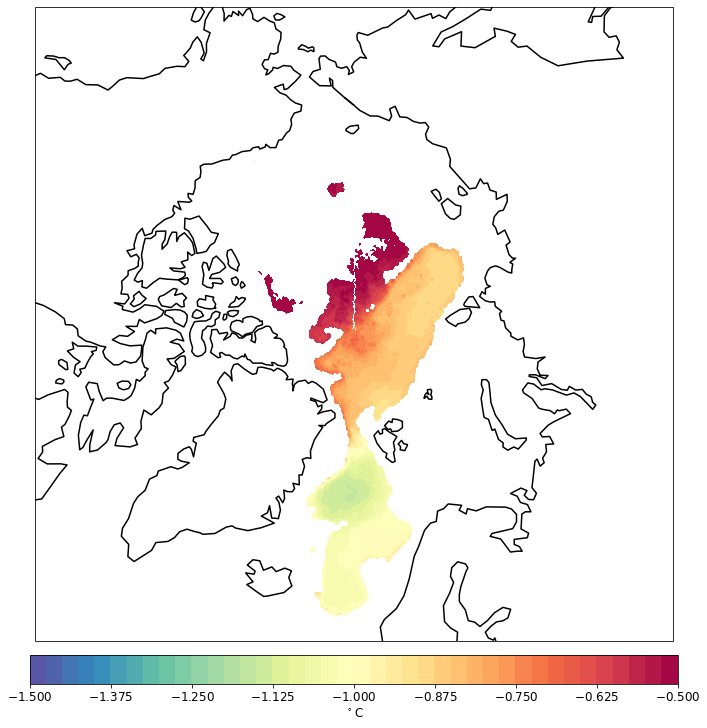

In [13]:
%%time
pf.tplot(mesh, data, ptype='cf', box=[-180, 180, 60, 90], mapproj='np', lw=0.5, levels=(-1.5, -0.5, 41))

Also for the different depth.

TODO:

- With Basemap it was possible to get rid of the line along 180 (by not using no_cyclic_elem). Now we have to live with it.

In [14]:
data = pf.get_data(data_path, "temp", [1948, 1949], mesh, how="mean", compute=True, depth=100)

Model depth: 100.0


minimum level changed to make cartopy happy
CPU times: user 175 ms, sys: 5.21 ms, total: 180 ms
Wall time: 180 ms


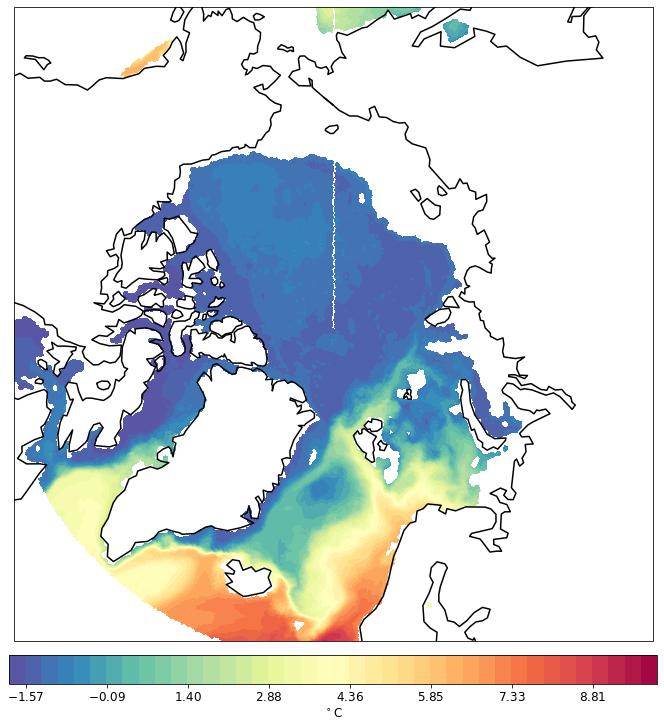

In [15]:
%%time
pf.tplot(mesh, data, ptype='cf', box=[-180, 180, 60, 90], mapproj='np', lw=0.5, levels=(-2, 10, 41))

The South is working as well.

CPU times: user 207 ms, sys: 5.36 ms, total: 212 ms
Wall time: 214 ms


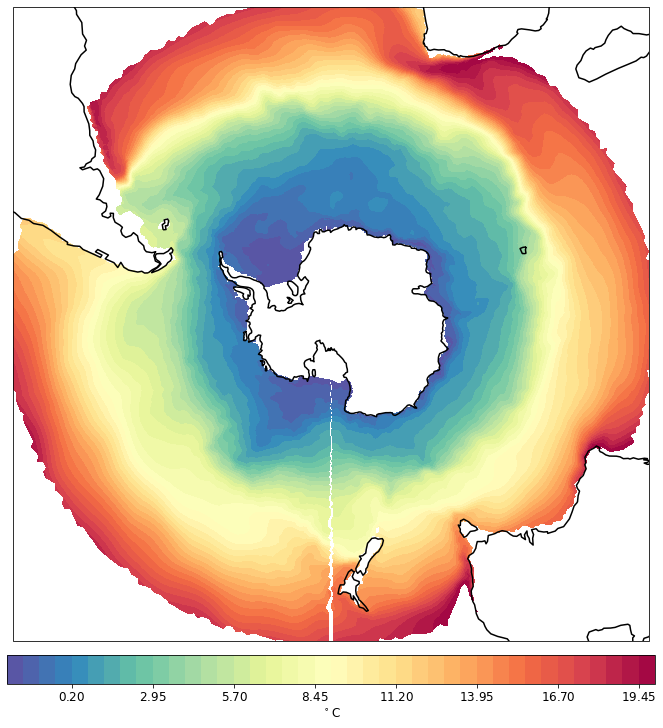

In [16]:
%%time
pf.tplot(mesh, data, ptype='cf', box=[-180, 180, -90, -30], mapproj='sp', lw=0.5, levels=(-2, 20, 41))

## Plotting on elements (faces)

In [9]:
import pyfesom2 as pf
import matplotlib.cm as cm

In [10]:
mesh = pf.load_mesh('../../DATA/core2/')

/Users/nkolduno/PYTHON/DATA/core2/pickle_mesh_py3_fesom2
The usepickle == True)
The pickle file for FESOM2 exists.
The mesh will be loaded from /Users/nkolduno/PYTHON/DATA/core2/pickle_mesh_py3_fesom2


In [11]:
data_path = '../../DATA/LCORE2/'

In [19]:
data = pf.get_data(data_path, "u", [1948, 1949], mesh, how="mean", compute=True, depth=0)

Model depth: 0.0


The only supported way to plot variables on elements (or faces) is to use `ptype='tri'`. The ploting for the whole globe is very slow, even if relatively small mesh is considered, so it is better to select smaller region.

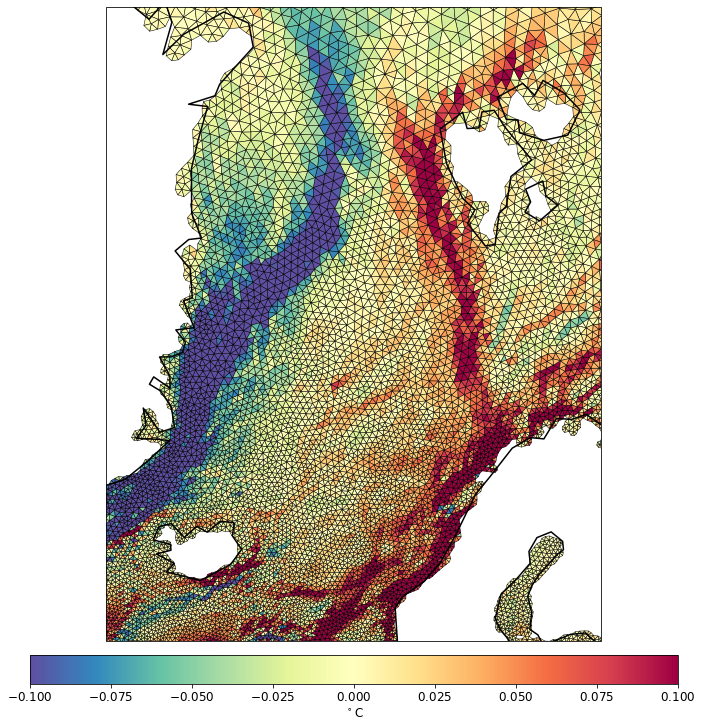

In [16]:
pf.tplot(mesh, data, ptype='tri',box=[-30, 30, 60, 82], mapproj='merc', lw=0.5, levels=(-0.1, 0.1, 41))

Example of `np` projection.

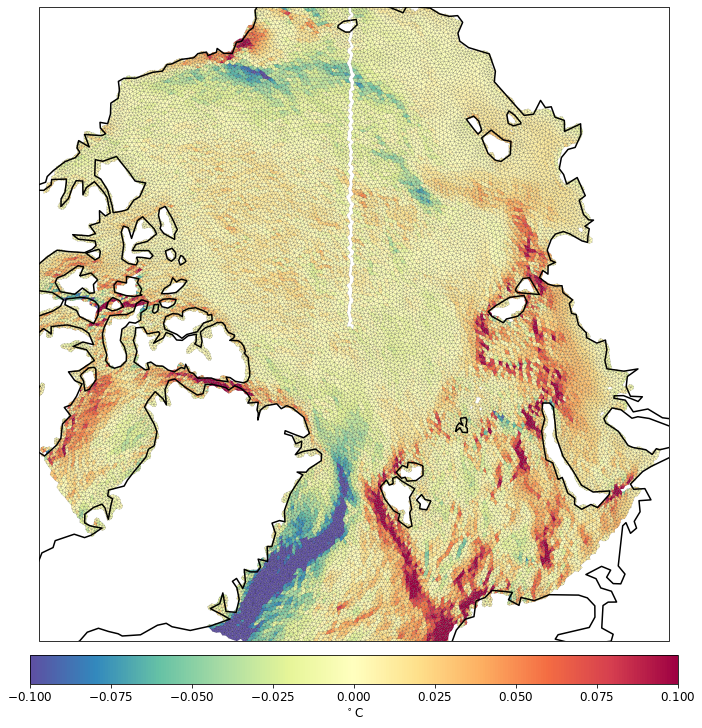

In [17]:
pf.tplot(mesh, data, ptype='tri', box=[-180, 180, 70, 90], mapproj='np', lw=0.1,levels=(-0.1, 0.1, 41))

The blank line along 180 longitude is to avoid cartopy confusion with coordinates of elements that cross 180 line.

Plot at deeper layers

Model depth: 100.0


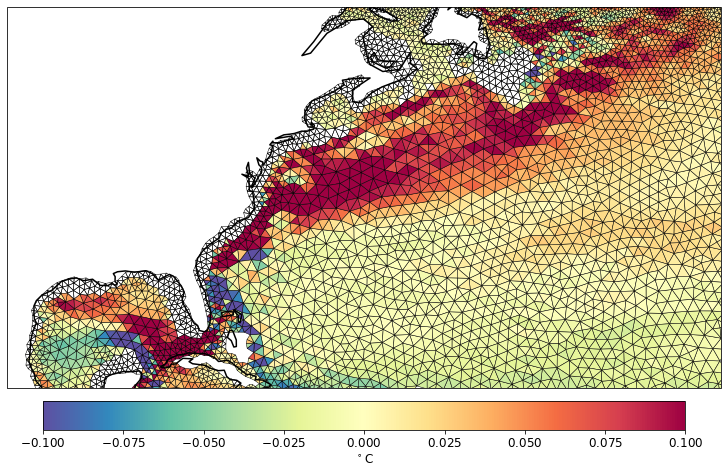

In [21]:
data = pf.get_data(data_path, "u", [1948, 1949], mesh, how="mean", compute=True, depth=100)
pf.tplot(mesh, data, ptype='tri',box=[-100, -30, 20, 50], mapproj='merc', lw=0.5, levels=(-0.1, 0.1, 41))

The surface mesh is still visible.